### Numerical data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns



In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
visa_df = pd.read_csv(r"C:\Users\SAMAR\PycharmProjects\Naresh IT\Classroom\Python seassons\data files\Visadataset - Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
cols = visa_df.select_dtypes(exclude="O").columns

In [5]:
cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

### prevailing_wage
- len
- min
- max
- mean
- std
- 75%
- 25%
- 50%

In [6]:
len(visa_df["prevailing_wage"])

25480

#### Min and Max

In [7]:
visa_df["prevailing_wage"].max()

319210.27

In [8]:
max(visa_df["prevailing_wage"])

319210.27

In [9]:
np.max(visa_df["prevailing_wage"])

319210.27

In [41]:
visa_df["prevailing_wage"].min()

2.1367

In [10]:
min(visa_df["prevailing_wage"])

2.1367

In [11]:
visa_df["prevailing_wage"].unique()

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

#### Mean and median

In [12]:
visa_df["prevailing_wage"].mean()

74455.81459209183

In [13]:
visa_df["prevailing_wage"].median()

70308.20999999999

In [14]:
np.mean(visa_df["prevailing_wage"])

74455.81459209183

In [15]:
np.median(visa_df["prevailing_wage"])

70308.20999999999

##### STD

In [16]:
visa_df["prevailing_wage"].std()


52815.94232687371

In [17]:
np.std(visa_df["prevailing_wage"])

52814.90589711416

In [18]:
wage_len = round(len(visa_df["prevailing_wage"]),2)
max_wage = round(visa_df["prevailing_wage"].max(),2)
min_wage = round(min(visa_df["prevailing_wage"]),2)
wage_mean = round(visa_df["prevailing_wage"].mean(),2)
wage_median = round(visa_df["prevailing_wage"].median(),2)
wage_std = round(visa_df["prevailing_wage"].std(),2)


In [19]:
# list_values = []
list_values = [wage_len,max_wage,min_wage,wage_mean,wage_median,wage_std]
list_values

[25480, 319210.27, 2.14, 74455.81, 70308.21, 52815.94]

In [20]:
index_list = ["len","max","min","mean","median","std"]

In [21]:
pd.DataFrame(list_values,columns=["prevailing_wage"],index=index_list)

,prevailing_wage
len,25480.00
max,319210.27
min,2.14
mean,74455.81
median,70308.21
std,52815.94


##### Percntile and quntile

- np.percentile()
-  it takes two aruments 1 is a = data another one is q is percentile  and values varies from 0-100

np.quntile()
-  data =a
- quntile :q the values varies from 0,1
- if you wnat  50p q = 0.5

In [44]:
wage_25 = round(np.percentile(visa_df["prevailing_wage"],25),2)
wage_50 = round(np.percentile(visa_df["prevailing_wage"],50),2)
wage_75 = round(np.percentile(visa_df["prevailing_wage"],75),2)

print(f"wage_25 :{wage_25} wage_50:{wage_50} wage_75{wage_75}")

wage_25 :34015.48 wage_50:70308.21 wage_75107735.51


In [23]:
wage_25p = round(np.quantile(visa_df["prevailing_wage"],0.25),2)
wage_50p = round(np.quantile(visa_df["prevailing_wage"],0.5),2)
wage_75p = round(np.quantile(visa_df["prevailing_wage"],0.75),2)

print(f"wage_25 :{wage_25} wage_50:{wage_50} wage_75: {wage_75}")

wage_25 :34015.48 wage_50:69.0 wage_75: 106.05


##### Understnd the percentile 

- there are 25 % employee has salaryu less then 34015
- - there are 50 % employee has salaryu less then 70308.21



In [24]:
con = visa_df["prevailing_wage"]<wage_25p
len(visa_df[con])

6370

In [25]:
con1 = visa_df["prevailing_wage"]<wage_50p
len(visa_df[con1])

12740

In [26]:
con2 = visa_df["prevailing_wage"]<wage_75p
len(visa_df[con2])

19110

#### Imperical rules 68-95-99.7

-  first calculate mean
-  then calculate std value

- con: mean-1*std
- con2; mean+1*std
- if you apply above condrion on wage data the output count data equal to 68% of data 
- 68% of total employee 17362

In [27]:
v1 = wage_mean-1*wage_std
v2 = wage_mean+1*wage_std

v1,v2

(21639.869999999995, 127271.75)

In [28]:
con1 = visa_df["prevailing_wage"]>=v1
con2 = visa_df["prevailing_wage"]<=v2

per_68 = visa_df[con1 & con2]
per_68

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.56,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.78,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [29]:
len(per_68),68*25480/100

(17171, 17326.4)

##### 95

In [30]:
v1 = wage_mean-2*wage_std
v2 = wage_mean+2*wage_std
v1,v2

(-31176.070000000007, 180087.69)

In [31]:
con1 = visa_df["prevailing_wage"]>=v1
con2 = visa_df["prevailing_wage"]<=v2

per_95 = visa_df[con1 & con2]
per_95

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [32]:
len(per_95),95*25480/100

(24582, 24206.0)

#### 99.7

In [33]:
v1 = wage_mean-3*wage_std
v2 = wage_mean+3*wage_std
v1,v2

con1 = visa_df["prevailing_wage"]>=v1
con2 = visa_df["prevailing_wage"]<=v2

per_99 = visa_df[con1 & con2]
per_99
len(per_99),99*25480/100

(25186, 25225.2)

In [34]:
# wage_25 = round(np.percentile(visa_df["education_of_employee"],25),2)
# wage_50 = round(np.percentile(visa_df["education_of_employee"],50),2)
# wage_75 = round(np.percentile(visa_df["education_of_employee"],75),2)

# print(f"wage_25 :{wage_25} wage_50:{wage_50} wage_75{wage_75}")

In [35]:
wage_len = round(len(visa_df["prevailing_wage"]),2)
max_wage = round(visa_df["prevailing_wage"].max(),2)
min_wage = round(min(visa_df["prevailing_wage"]),2)
wage_mean = round(visa_df["prevailing_wage"].mean(),2)
wage_median = round(visa_df["prevailing_wage"].median(),2)
wage_std = round(visa_df["prevailing_wage"].std(),2)



wage_25p = round(np.quantile(visa_df["prevailing_wage"],0.25),2)
wage_50p = round(np.quantile(visa_df["prevailing_wage"],0.5),2)
wage_75p = round(np.quantile(visa_df["prevailing_wage"],0.75),2)

print(f"wage_25 :{wage_25} wage_50:{wage_50} wage_75: {wage_75}")


# list_values = []
list_values = [wage_len,max_wage,min_wage,wage_mean,wage_median,wage_std,wage_25p,wage_50p,wage_75p]

index_list = ["len","max","min","mean","median","std","25%","50%","75%"]

pd.DataFrame(list_values,columns=["prevailing_wage"],index=index_list)

wage_25 :34015.48 wage_50:69.0 wage_75: 106.05


,prevailing_wage
len,25480.00
max,319210.27
min,2.14
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


In [36]:
analyis_list = ["no_of_employees","yr_of_estab","prevailing_wage"]

In [37]:
for i in visa_df.columns:
    if i in analyis_list:
        print(i)
        

no_of_employees
yr_of_estab
prevailing_wage


In [40]:
l1 = []
for i in analyis_list:
        
        # len = round(len(visa_df[i]),2)
        max = round(visa_df[i].max(),2)
        min = (visa_df[i].min())
        mean = round(visa_df[i].mean(),2)
        median = round(visa_df[i].median(),2)
        std = round(visa_df[i].std(),2)



        p25 = round(np.quantile(visa_df[i],0.25),2)
        p50 = round(np.quantile(visa_df[i],0.5),2)
        p75 = round(np.quantile(visa_df[i],0.75),2)

        # print(f"wage_25 :{wage_25} wage_50:{wage_50} wage_75: {wage_75}")

        # list_values = []
        l1.append([len,max,min,mean,median,std,p25,p50,p75])
l1
index_names = ["len","max","min","mean","median","std","25%","50%","75%"]

pd.DataFrame(l1,columns=index_names,index=analyis_list).T

,no_of_employees,yr_of_estab,prevailing_wage
len,25480.00,25480.00,25480.0000
max,602069.00,2016.00,319210.2700
min,-26.00,1800.00,2.1367
mean,5667.04,1979.41,74455.8100
median,2109.00,1997.00,70308.2100
std,22877.93,42.37,52815.9400
25%,1022.00,1976.00,34015.4800
50%,2109.00,1997.00,70308.2100
75%,3504.00,2005.00,107735.5100


#### We can do it in describe

In [ ]:
# Its only for numerical data
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### Histogram
- histogram can get by matplot lib
- histogram can get by also seaborn
- plt.hist()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# for i in visa_df.select_dtypes(exclude="object"):    
#     plt.hist([i])
#     plt.show()

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

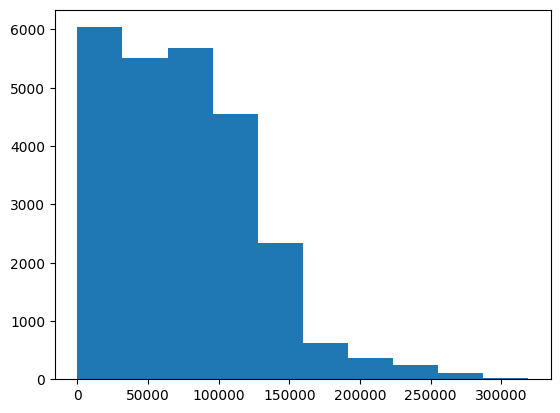

In [ ]:
plt.hist(visa_df["prevailing_wage"],bins=10)

from interval range
- 2.13670000e+00, 3.19229500e+04,
    - 6038 people are there
-  6.38437634e+04, 9.57645767e+04
    - 5504

- histogram will give 3 outputs 
- frequency
  - in interval range how many observation are there
  
- interval
  - interval range
 
- no of intervals

#### Cehck point 1

 - - 2.13670000e+00, 3.19229500e+04,
    - 6038 people are there

In [ ]:
2.13670000e+00, 3.19229500e+04,


(2.1367, 31922.95)

In [ ]:
con1 = visa_df["prevailing_wage"]>=2.13670
con2= visa_df["prevailing_wage"]<31922

visa_df[con1&con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


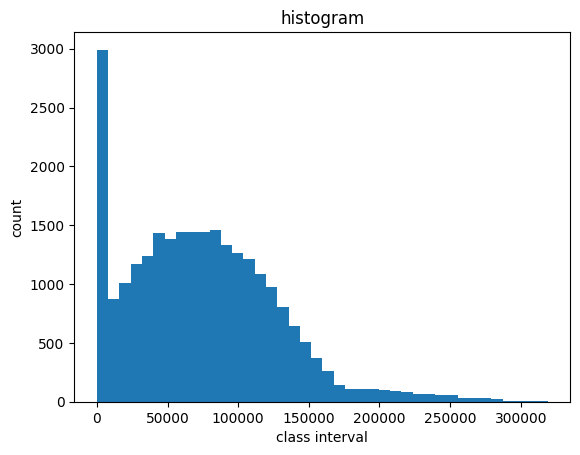

In [ ]:
f,i,n = plt.hist(visa_df["prevailing_wage"],bins=40)
plt.title("histogram")
plt.xlabel("class interval")
plt.ylabel("count")
plt.show()

In [ ]:
# for i in visa_df.select_dtypes(exclude="object"):    
#     f,i,n = plt.hist(visa_df[i],bins=40)
#     plt.subplot()
#     plt.title("histogram")
#     plt.xlabel("class interval")
#     plt.ylabel("count")
#     plt.show()



Text(0, 0.5, 'count')

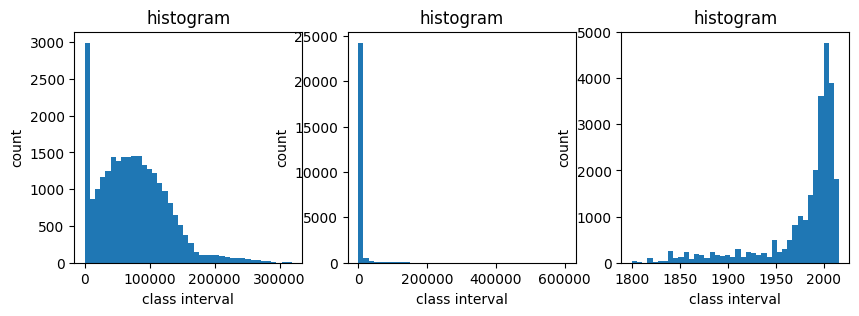

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(visa_df["prevailing_wage"],bins=40)
plt.title("prevailing_wage")
plt.xlabel("class interval")
plt.ylabel("count")
# plt.show()

plt.subplot(1,3,2)
plt.hist(visa_df["no_of_employees"],bins=40)
plt.title("no_of_employees")
plt.xlabel("class interval")
plt.ylabel("count")
# plt.show()

plt.subplot(1,3,3)
plt.hist(visa_df["yr_of_estab"],bins=40)
plt.title("yr_of_estab")
plt.xlabel("class interval")
plt.ylabel("count")
# plt.show()

In [ ]:
analyis_list = []
for i in visa_df.select_dtypes(exclude="object"):    
    analyis_list.append(i)
analyis_list

list

In [ ]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

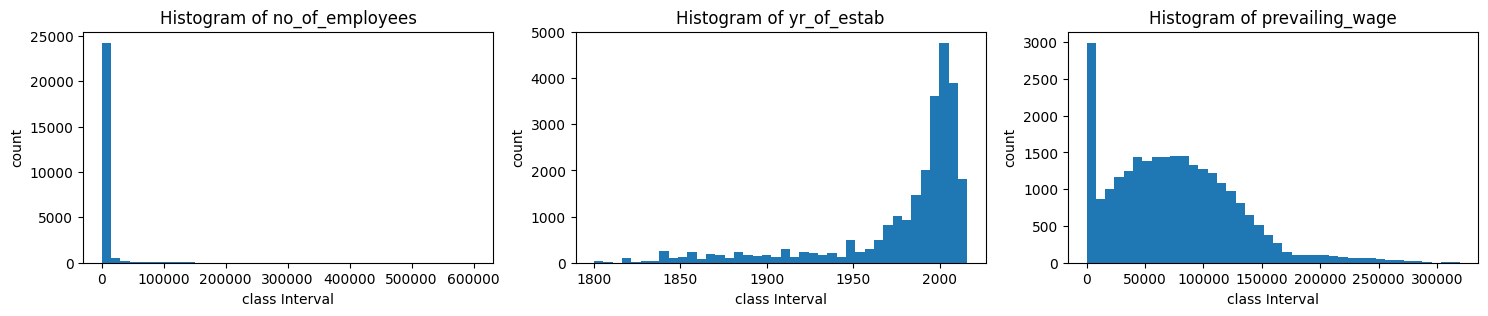

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    plt.hist(visa_df[cols[i]],bins=40)
    plt.title(f"Histogram of {cols[i]}")
    plt.xlabel("class Interval")
    plt.ylabel("count")

### Histogram using seaborn
 - histplot
 - displot

In [ ]:
import seaborn as sns

<Axes: xlabel='prevailing_wage', ylabel='Count'>

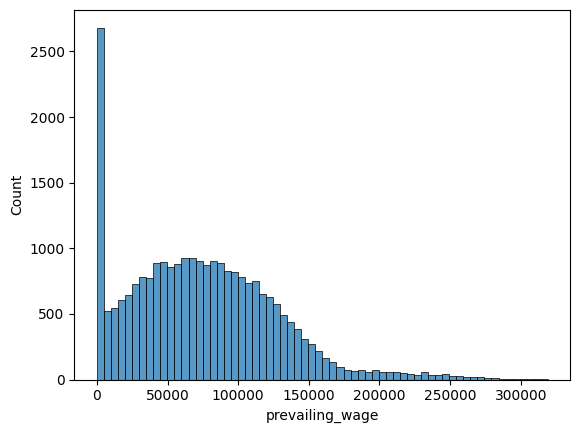

In [ ]:
sns.histplot(visa_df,x="prevailing_wage")

<Axes: xlabel='prevailing_wage', ylabel='Density'>

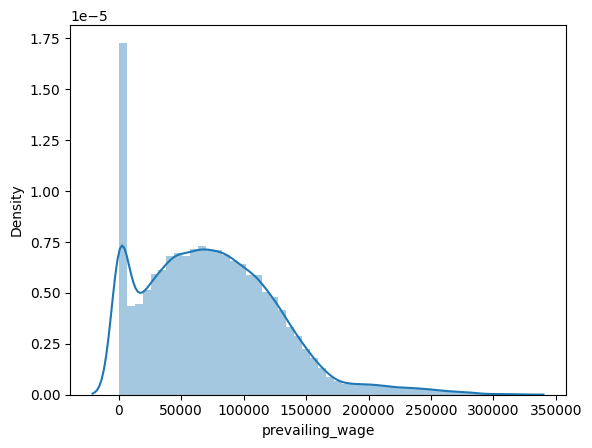

In [ ]:

sns.distplot(visa_df["prevailing_wage"])

In [ ]:
cols